In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

In [2]:
data= pd.read_csv('Nifty50_file.csv')
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Oct 27, 2022",17736.95,17771.40,17783.90,17654.50,324.65M,0.46%
1,"Oct 25, 2022",17656.35,17808.30,17811.50,17637.00,251.36M,-0.42%
2,"Oct 24, 2022",17730.75,17736.35,17777.55,17707.40,45.03M,0.88%
3,"Oct 21, 2022",17576.30,17622.85,17670.15,17520.75,277.70M,0.07%
4,"Oct 20, 2022",17563.95,17423.10,17584.15,17421.00,249.60M,0.30%


In [3]:
data1= pd.read_csv('USD_INR.csv')
data1.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Oct 25, 2022",82.88,82.81,82.93,82.58,3.37M,0.05%
1,"Oct 24, 2022",82.83,82.93,82.93,82.79,371.28K,-0.16%
2,"Oct 21, 2022",82.97,82.89,83.13,82.54,5.62M,0.23%
3,"Oct 20, 2022",82.78,83.04,83.32,82.73,5.60M,-0.45%
4,"Oct 19, 2022",83.15,82.42,83.18,82.36,3.94M,0.85%


In [4]:
data.shape

(1136, 7)

In [5]:
data1.shape

(1113, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1136 non-null   object 
 1   Price   1136 non-null   float64
 2   Open    1136 non-null   float64
 3   High    1136 non-null   float64
 4   Low     1136 non-null   float64
 5   Volume  1136 non-null   object 
 6   Chg%    1136 non-null   object 
dtypes: float64(4), object(3)
memory usage: 62.2+ KB


In [7]:
data['Date']= pd.to_datetime(data['Date'])

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1113 non-null   object 
 1   Price   1113 non-null   float64
 2   Open    1113 non-null   float64
 3   High    1113 non-null   float64
 4   Low     1113 non-null   float64
 5   Volume  1113 non-null   object 
 6   Chg%    1113 non-null   object 
dtypes: float64(4), object(3)
memory usage: 61.0+ KB


In [9]:
data1['Date']= pd.to_datetime(data1['Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1136 non-null   datetime64[ns]
 1   Price   1136 non-null   float64       
 2   Open    1136 non-null   float64       
 3   High    1136 non-null   float64       
 4   Low     1136 non-null   float64       
 5   Volume  1136 non-null   object        
 6   Chg%    1136 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 62.2+ KB


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1113 non-null   datetime64[ns]
 1   Price   1113 non-null   float64       
 2   Open    1113 non-null   float64       
 3   High    1113 non-null   float64       
 4   Low     1113 non-null   float64       
 5   Volume  1113 non-null   object        
 6   Chg%    1113 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 61.0+ KB


In [12]:
data.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [13]:
data1.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

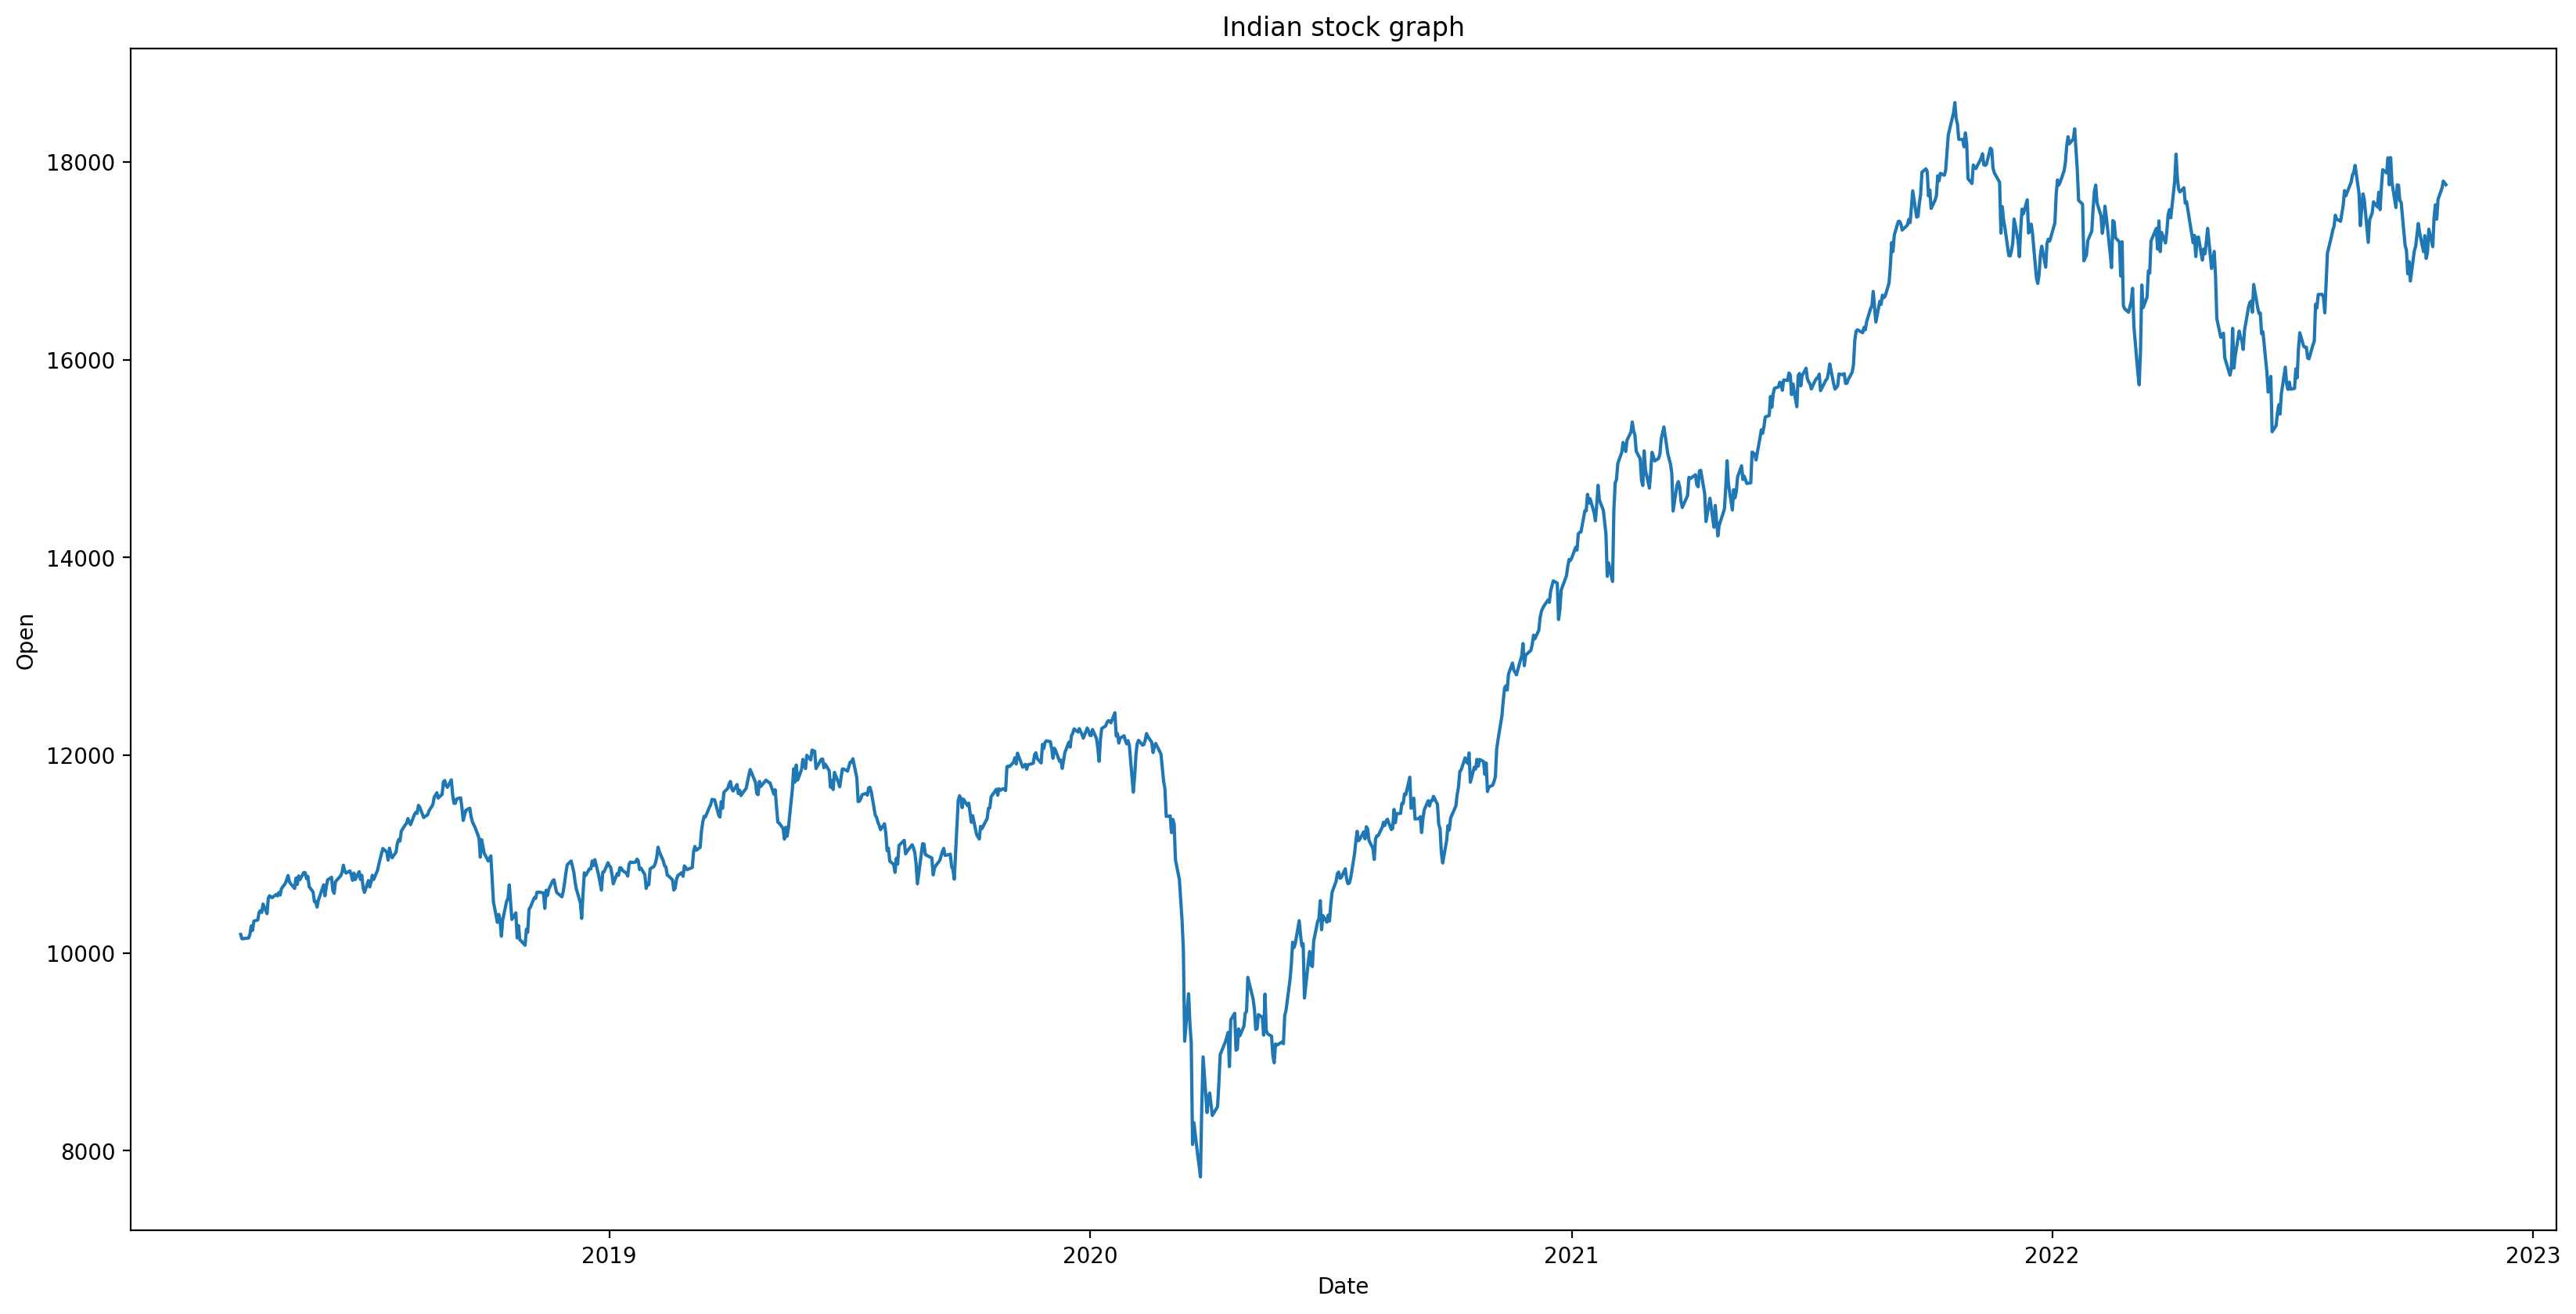

In [46]:
plt.figure(figsize=(20,10),dpi=200)
sns.lineplot(x='Date',y='Open',data=data)
plt.title('Indian stock graph')
plt.show()

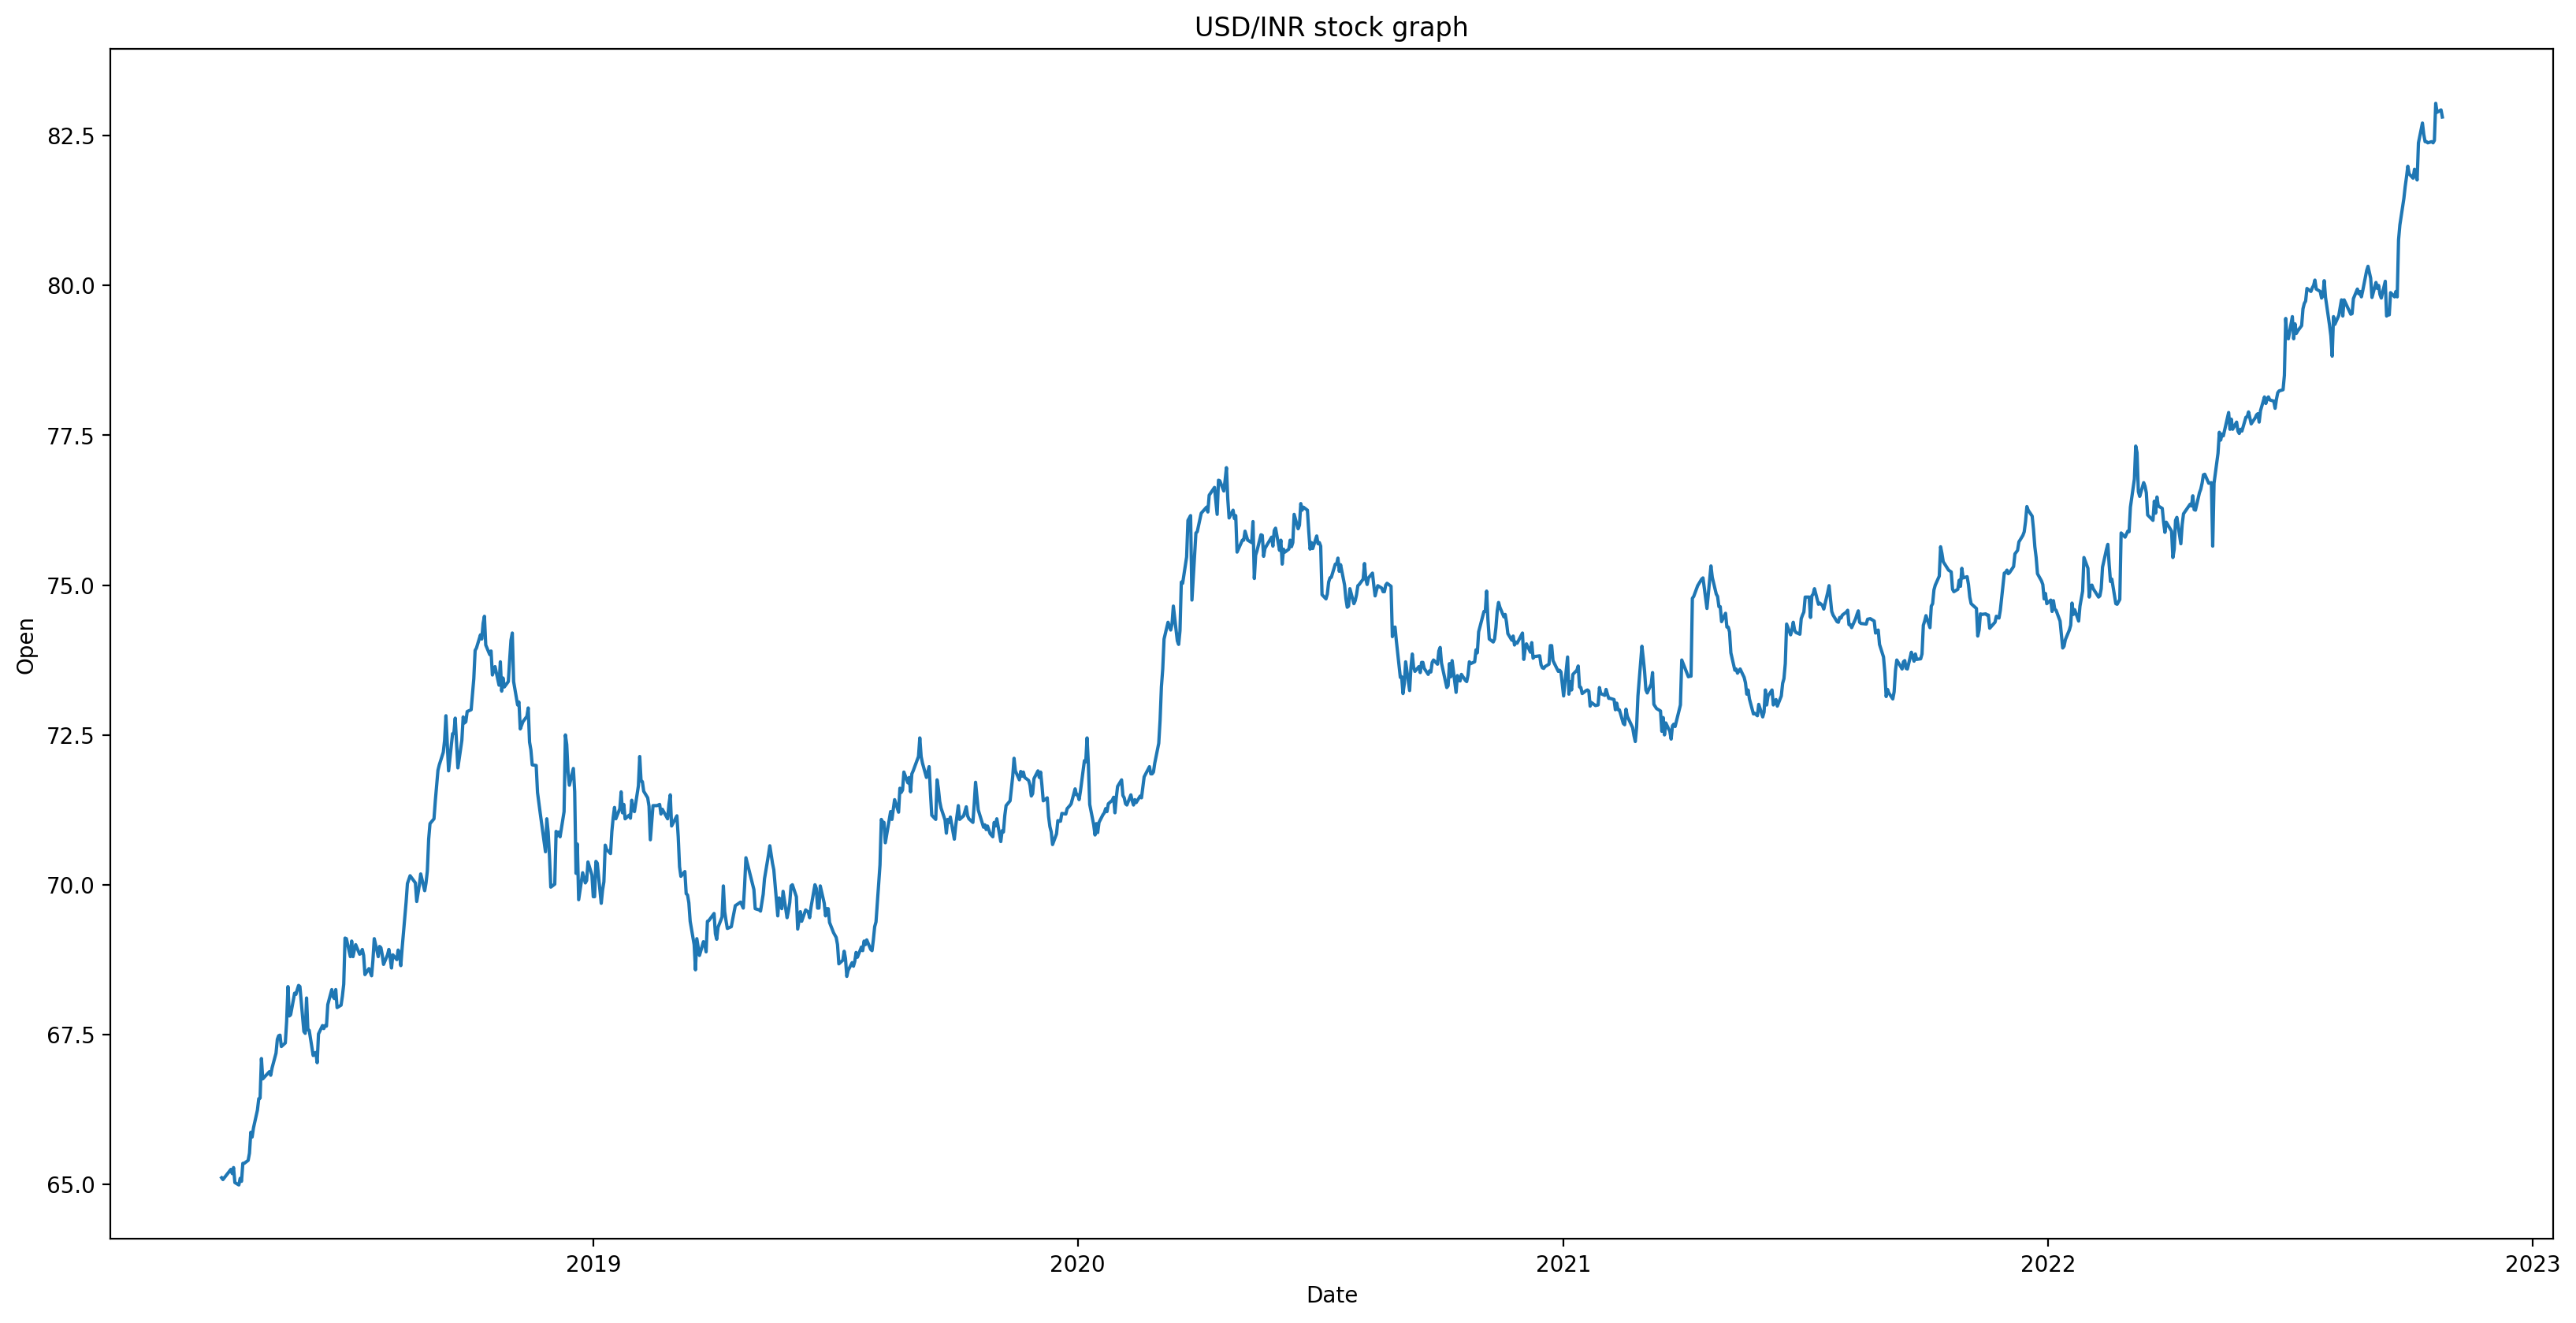

In [47]:
plt.figure(figsize=(20,10),dpi=200)
sns.lineplot(x='Date',y='Open',data=data1)
plt.title('USD/INR stock graph')
plt.show()

<AxesSubplot:xlabel='year', ylabel='high mean'>

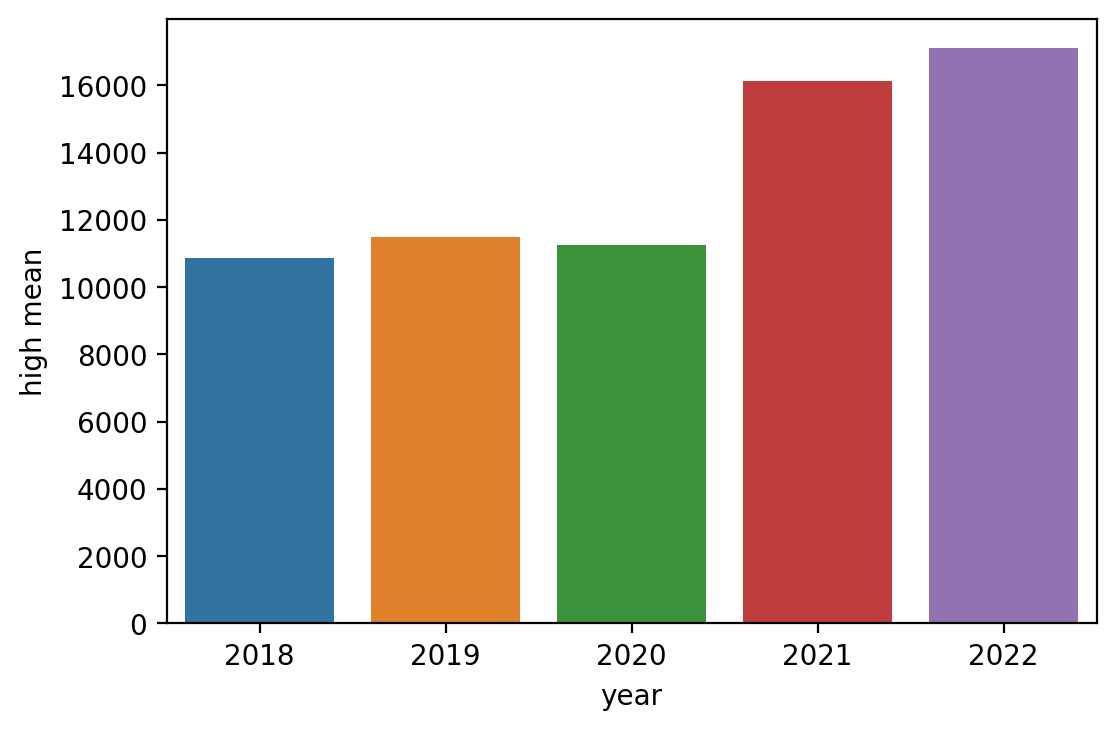

In [16]:
data['year']= data['Date'].dt.year
data['year'].unique()
q = data.groupby('year')['High'].mean()
q= q.reset_index(drop=False)
q.columns=['year','high mean']
plt.figure(dpi=200)
sns.barplot(x='year',y='high mean',data=q)

<AxesSubplot:xlabel='year', ylabel='high mean'>

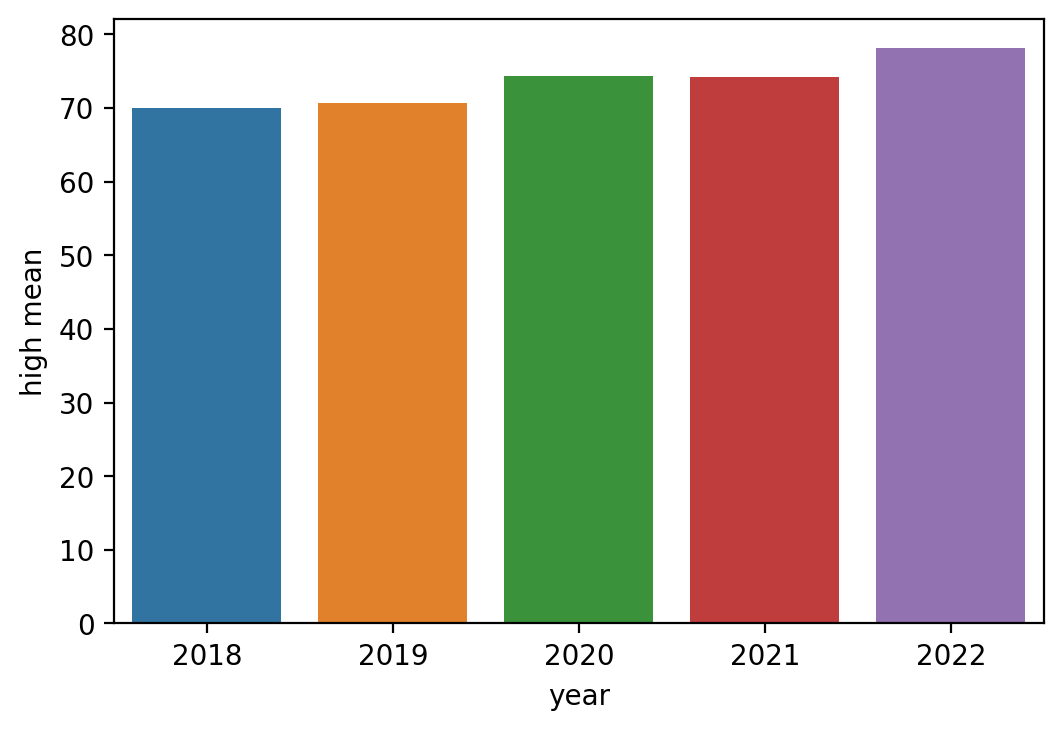

In [17]:
data1['year']= data1['Date'].dt.year
data1['year'].unique()
e = data1.groupby('year')['High'].mean()
e= e.reset_index(drop=False)
e.columns=['year','high mean']
plt.figure(dpi=200)
sns.barplot(x='year',y='high mean',data=e)

In [18]:
data['month']= data['Date'].dt.month
mon_dic={1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['month_name']=data['month'].apply(lambda y:mon_dic[y])

x=data.groupby(['month','month_name'])['High'].mean()
x=x.reset_index(drop=False)
x.columns=['month','month_name','mean_High_val']
x.head()

,month,month_name,mean_High_val
0,1,Jan,13682.999419
1,2,Feb,13831.658125
2,3,Mar,13209.961310
3,4,Apr,12720.391146
4,5,May,12646.019231


Text(0.5, 1.0, 'Month vise Indian stock opening graph')

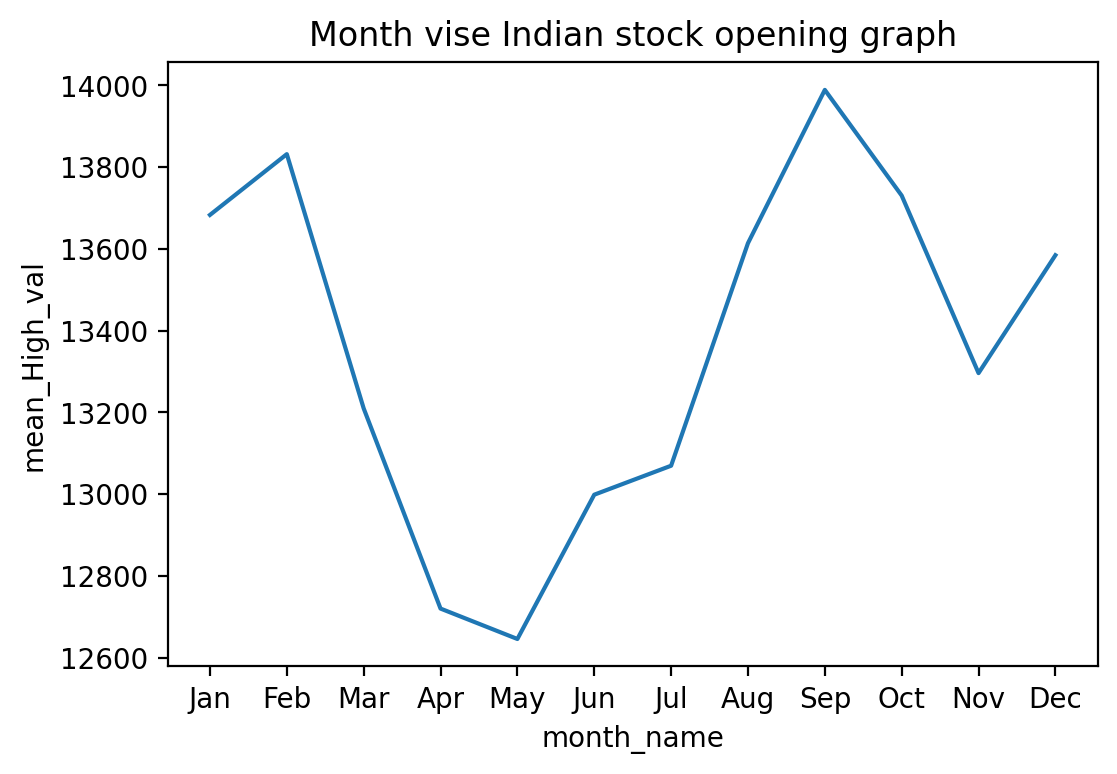

In [43]:
plt.figure(dpi=200)
sns.lineplot(x='month_name',y='mean_High_val',data=x)
plt.title('Month vise Indian stock opening graph')

In [21]:
data1['month']= data1['Date'].dt.month
mon_dic={1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data1['month_name']=data1['month'].apply(lambda y:mon_dic[y])

z=data1.groupby(['month','month_name'])['High'].mean()
z=z.reset_index(drop=False)
z.columns=['month','month_name','mean_High_val']
z.head()

,month,month_name,mean_High_val
0,1,Jan,72.551744
1,2,Feb,72.896800
2,3,Mar,73.468675
3,4,Apr,72.571573
4,5,May,72.753762


Text(0.5, 1.0, 'Month vise USD/INR stock opening graph')

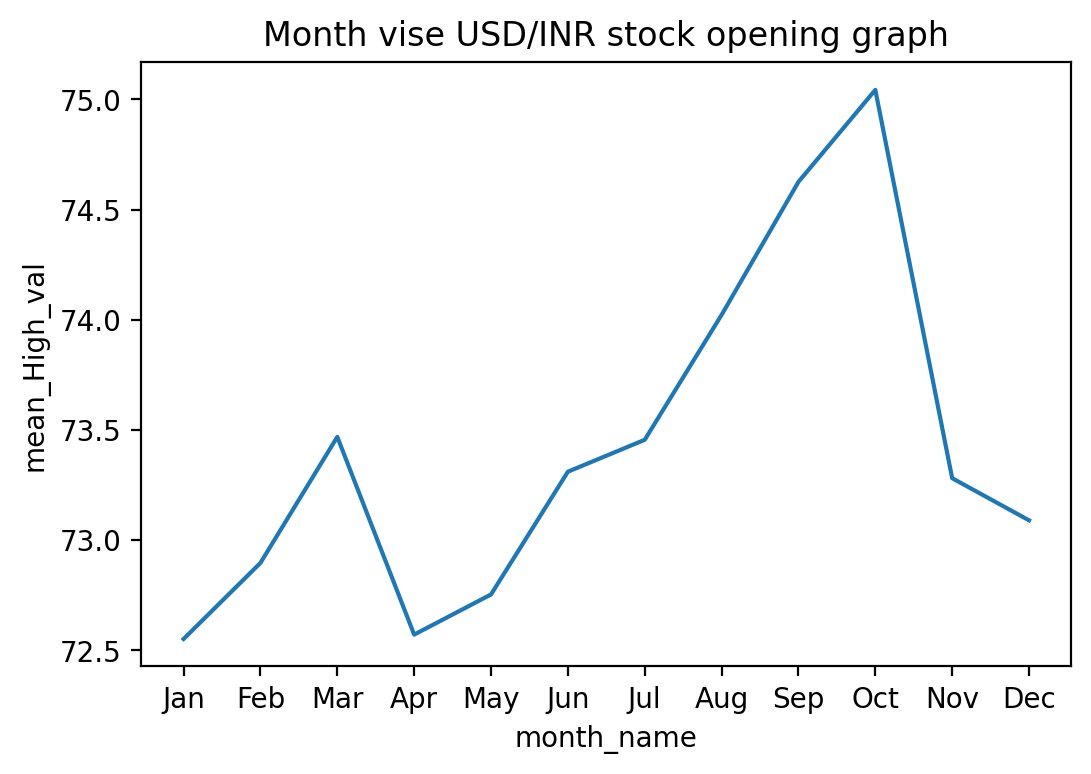

In [44]:
plt.figure(dpi=200)
sns.lineplot(x='month_name',y='mean_High_val',data=z)
plt.title('Month vise USD/INR stock opening graph')

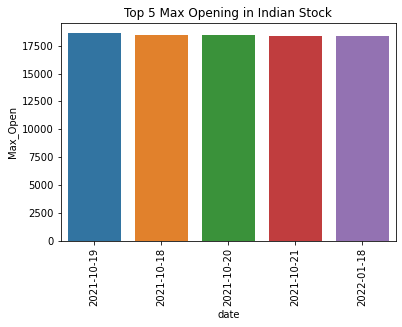

In [38]:
b=pd.DataFrame()
b['date']=data['Date']
b['Max_Open']=data['Open']
b['date']=b['date'].dt.date
b= b.sort_values(by='Max_Open',ascending= False)
b=b.reset_index(drop= True)
b=b.iloc[0:5]

sns.barplot(x='date',y='Max_Open',data=b)
plt.xticks(rotation= 90)
plt.title('Top 5 Max Opening in Indian Stock')
plt.show()

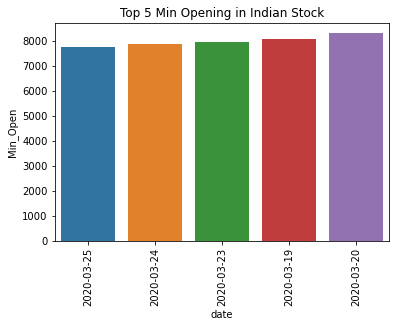

In [39]:
p=pd.DataFrame()
p['date']=data['Date']
p['Min_Open']=data['Open']
p['date']=p['date'].dt.date
p= p.sort_values(by='Min_Open',ascending= True)
p=p.reset_index(drop= True)
p=p.iloc[0:5]

sns.barplot(x='date',y='Min_Open',data=p)
plt.xticks(rotation= 90)
plt.title('Top 5 Min Opening in Indian Stock')
plt.show()

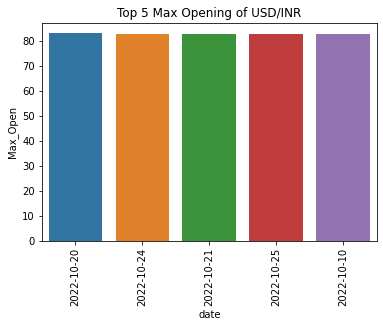

In [41]:
v=pd.DataFrame()
v['date']=data1['Date']
v['Max_Open']=data1['Open']
v['date']=v['date'].dt.date
v= v.sort_values(by='Max_Open',ascending= False)
v=v.reset_index(drop= True)
v=v.iloc[0:5]

sns.barplot(x='date',y='Max_Open',data=v)
plt.xticks(rotation= 90)
plt.title('Top 5 Max Opening of USD/INR')
plt.show()

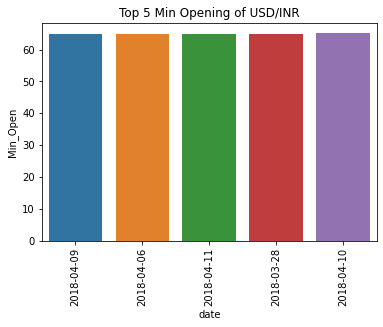

In [42]:
u=pd.DataFrame()
u['date']=data1['Date']
u['Min_Open']=data1['Open']
u['date']=u['date'].dt.date
u= u.sort_values(by='Min_Open',ascending= True)
u=u.reset_index(drop= True)
u=u.iloc[0:5]

sns.barplot(x='date',y='Min_Open',data=u)
plt.xticks(rotation= 90)
plt.title('Top 5 Min Opening of USD/INR')
plt.show()

ValueError: Boolean array expected for the condition, not object

,Date,Price,Open,High,Low,Volume,Chg%,year,month,month_name
0,2022-10-27,17736.95,17771.40,17783.90,17654.50,324.65M,0.46%,2022,10,Oct
1,2022-10-25,17656.35,17808.30,17811.50,17637.00,251.36M,-0.42%,2022,10,Oct
2,2022-10-24,17730.75,17736.35,17777.55,17707.40,45.03M,0.88%,2022,10,Oct
3,2022-10-21,17576.30,17622.85,17670.15,17520.75,277.70M,0.07%,2022,10,Oct
4,2022-10-20,17563.95,17423.10,17584.15,17421.00,249.60M,0.30%,2022,10,Oct
...,...,...,...,...,...,...,...,...,...,...
1131,2018-04-04,10128.40,10274.60,10279.85,10111.30,238.18B,-1.14%,2018,4,Apr
1132,2018-04-03,10245.00,10186.85,10255.35,10171.05,211.65B,0.33%,2018,4,Apr
1133,2018-04-02,10211.80,10151.65,10220.10,10127.75,232.43B,0.97%,2018,4,Apr
1134,2018-03-28,10113.70,10143.60,10158.35,10096.90,354.98B,-0.69%,2018,3,Mar
